In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../data/processed/medias3.csv')

# Convertir la columna 'fecha' a tipo datetime si no está ya en ese formato
data['fecha'] = pd.to_datetime(data['index'])

# Establecer la columna 'fecha' como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que los datos están ordenados cronológicamente
data.sort_index(inplace=True)

# Visualizar los primeros registros para verificar
print(data.head())


                 index         ao
fecha                            
2014-01-16  2014-01-16  94.800000
2014-01-17  2014-01-17  84.406791
2014-01-18  2014-01-18  74.638843
2014-01-19  2014-01-19  65.479142
2014-01-20  2014-01-20  56.910670


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

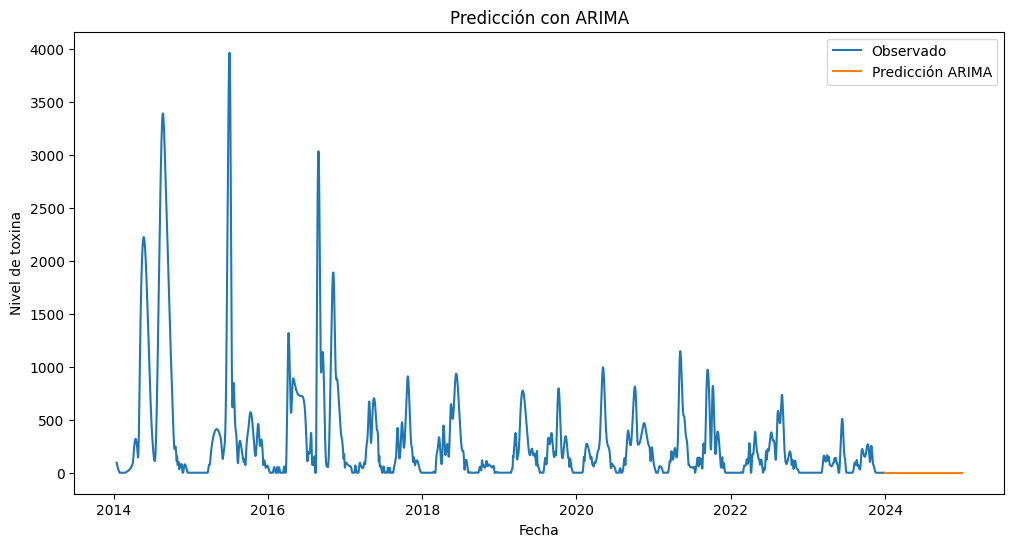

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Ajuste del modelo ARIMA
model_arima = ARIMA(data['ao'], order=(5, 1, 0))  # Ejemplo de orden (p, d, q)
model_arima_fit = model_arima.fit()

# Realizar predicciones
forecast_arima = model_arima_fit.predict(start='2024-01-01', end='2024-12-31', typ='levels')

# Visualización de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['ao'], label='Observado')
plt.plot(forecast_arima.index, forecast_arima, label='Predicción ARIMA')
plt.title('Predicción con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Nivel de toxina')
plt.legend()
plt.show()


19:46:07 - cmdstanpy - INFO - Chain [1] start processing
19:46:07 - cmdstanpy - INFO - Chain [1] done processing


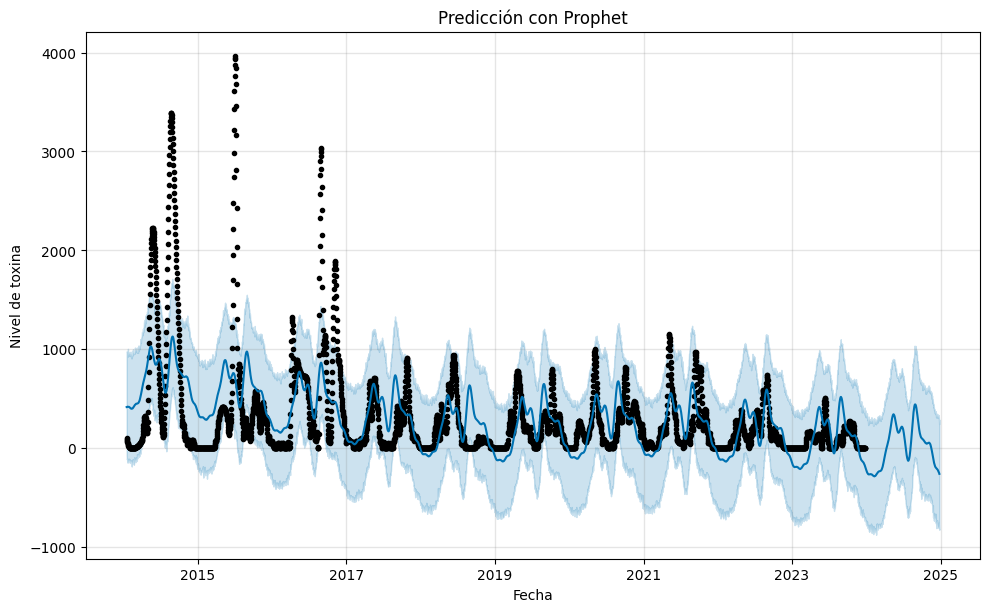

In [10]:
from prophet import Prophet

# Preparar los datos para Prophet
prophet_data = data.reset_index().rename(columns={'fecha': 'ds', 'ao': 'y'})

# Instanciar y ajustar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Crear un dataframe de fechas futuras para la predicción
future = model_prophet.make_future_dataframe(periods=365, freq='D')

# Realizar la predicción
forecast_prophet = model_prophet.predict(future)

# Visualización de las predicciones
fig = model_prophet.plot(forecast_prophet)
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Nivel de toxina')
plt.show()
forecast_prophet = forecast_prophet[['ds', 'yhat']]

forecast_prophet.to_csv('../data/processed/prophet2.csv', index=False)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Dividir los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Preparar datos de entrada y salida
X_train, y_train = train_data.index.factorize()[0].reshape(-1, 1), train_data['ao']
X_test, y_test = test_data.index.factorize()[0].reshape(-1, 1), test_data['ao']

# Entrenar el modelo RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Realizar predicciones para 2024
future_index = pd.Index(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'))
X_future = future_index.factorize()[0].reshape(-1, 1)
forecast_rf = model_rf.predict(X_future)

# Visualización de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['ao'], label='Observado')
plt.plot(future_index, forecast_rf, label='Predicción Random Forest')
plt.title('Predicción con Random Forest Regression')
plt.xlabel('Fecha')
plt.ylabel('Nivel de toxina')
plt.legend()
plt.show()


AttributeError: 'DatetimeIndex' object has no attribute 'toordinal'

Epoch 1/50


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7416e-04
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1156e-04
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1480e-04
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0025e-04
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8575e-04
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8432e-04
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3863e-04
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2697e-04
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1834e-05
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3911e-04
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1079e-04
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2707e-05
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

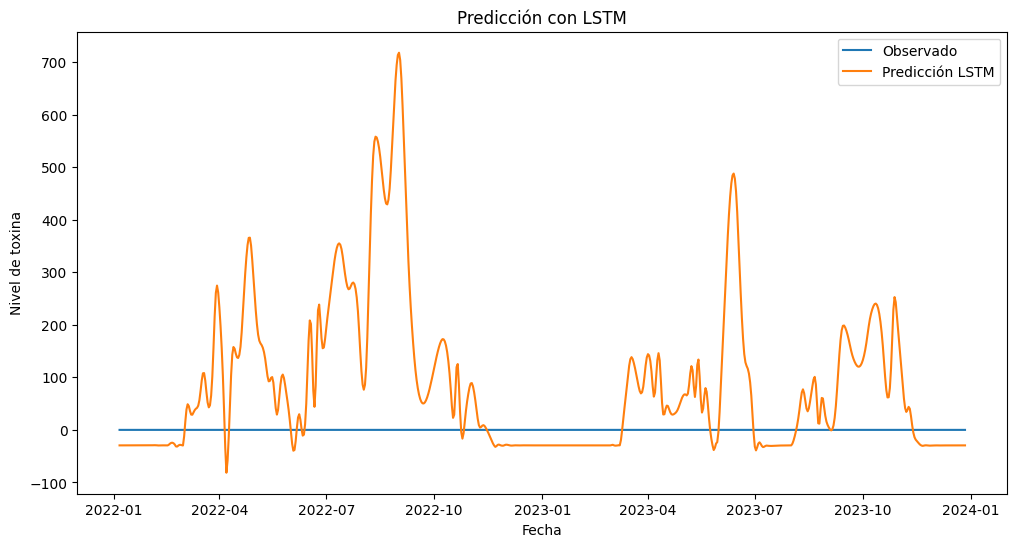

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['ao']])

# Función para preparar secuencias de tiempo
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir longitud de la secuencia temporal
seq_length = 30  # Ejemplo, ajustar según sea necesario

# Crear secuencias de tiempo
X_seq, y_seq = create_sequences(scaled_data, seq_length)

# Dividir en datos de entrenamiento y prueba
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Reshape para LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Crear modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenar el modelo LSTM
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Realizar predicciones
forecast_lstm = model_lstm.predict(X_test)

# Invertir la escala de las predicciones
forecast_lstm = scaler.inverse_transform(forecast_lstm)

# Visualización de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Observado')
plt.plot(data.index[-len(y_test):], forecast_lstm, label='Predicción LSTM')
plt.title('Predicción con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Nivel de toxina')
plt.legend()
plt.show()

